In [3]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
ctg = ['musicality', 'note accuracy', 'rhythmic accuracy', 'tone quality']

In [4]:
def loadMatFile(name):
    matfile = sio.loadmat(name)
    return matfile['AccuList'], matfile['NewList']

In [5]:
acculist_sr = [loadMatFile(str(i) + 'forward_fullset_sr')[0] for i in np.arange(1,5)]
newlist_sr = [loadMatFile(str(i) + 'forward_fullset_sr')[1] for i in np.arange(1,5)]
acculist_tech = [loadMatFile(str(i) + 'forward_fullset_tech')[0] for i in np.arange(1,5)]
newlist_tech = [loadMatFile(str(i) + 'forward_fullset_tech')[1] for i in np.arange(1,5)]

In [6]:
def compareCategories(featureGroup, category = None):
    # plot the accuracy curve and the order of features in featureGroup (4 categories)
    # featureGroup: index of features in a group
    fig = plt.figure(figsize=(18,24))
    if category == None:
        category = np.arange(1,5)
    for i in category:
        I = np.argsort(newlist_tech[i-1].flatten())
        p_feature = I[featureGroup-1]+1
        
        plt.subplot(4,2,2*i-1)
        # plot the accuracy: technical
        plt.plot(np.arange(1,136), acculist_tech[i-1].flatten())
        # plot the positions of features in featureGroup
        plt.plot(p_feature, np.zeros_like(p_feature) + 0.2, 'x')
        plt.plot([50,50], [0,0.6],'-r')
        plt.ylim([0, 0.6])
        plt.ylabel('RSQ')
        plt.title(ctg[i-1])
        
        I = np.argsort(newlist_sr[i-1].flatten())
        p_feature = I[featureGroup-1]+1
        
        plt.subplot(4,2,2*i)
        # plot the accuracy: sight-reading
        plt.plot(np.arange(1,136), acculist_sr[i-1].flatten())
        # plot the positions of features in featureGroup
        plt.plot(p_feature, np.zeros_like(p_feature) + 0.2, 'x')
        plt.plot([50,50], [0,0.6],'-r')
        plt.ylim([0, 0.6])
        plt.ylabel('RSQ')
        plt.title(ctg[i-1])

    plt.show()

In [7]:
def compareGroups(ctgIdx, featureGroups, groupName):
    # plot the accuracy curve and the order of features in featureGroup
    # sight-reading/technical, one category, compare among groups
    # newlist: a list of feature idx, order in feature selection (4 category)
    # acculist: corresponding accuracy (Rsq) (4 category)
    # featureGroups: a list of feature groups
    groupNum = len(featureGroups)
    fig = plt.figure(figsize=(18,5*groupNum))
    for i in np.arange(groupNum):
        I = np.argsort(newlist_tech[ctgIdx-1].flatten())
        p_feature = I[featureGroups[i]-1]+1
        
        plt.subplot(groupNum, 2, 2*i+1)
        # plot the accuracy: technical
        plt.plot(np.arange(1,136), acculist_tech[ctgIdx-1].flatten())
        # plot the positions of features in featureGroup
        plt.plot(p_feature, np.zeros_like(p_feature) + 0.2, 'x')
        plt.plot([50,50], [0,0.6],'-r')
        plt.ylabel('RSQ')
        plt.ylim([0, 0.6])
        plt.title(groupName[i])
        
        I = np.argsort(newlist_sr[ctgIdx-1].flatten())
        p_feature = I[featureGroups[i]-1]+1
        
        plt.subplot(groupNum, 2, 2*i+2)
        # plot the accuracy: sight-reading
        plt.plot(np.arange(1,136), acculist_sr[ctgIdx-1].flatten())
        # plot the positions of features in featureGroup
        plt.plot(p_feature, np.zeros_like(p_feature) + 0.2, 'x')
        plt.plot([50,50], [0,0.6],'-r')
        plt.ylabel('RSQ')
        plt.ylim([0, 0.6])
        plt.title(groupName[i])

    plt.show()

In [8]:
# Left: Technical Exercise
# Right: Sight-reading exercise

In [9]:
# feature groups
# std, nonscore, score
feature_std = np.arange(1, 69)
feature_nonscore = np.arange(69, 93)
feature_score = np.arange(93, 136)

# dtw-related features
feature_dtwjump = np.array([105,106,114,115,116,117])+1
# note length ratio (mean)
feature_nlr_mean = np.array([118,120,125,127,129,131,133])+1
# note length ratio (std)
feature_nlr_std = np.array([119,121,126,128,130,132,134])+1

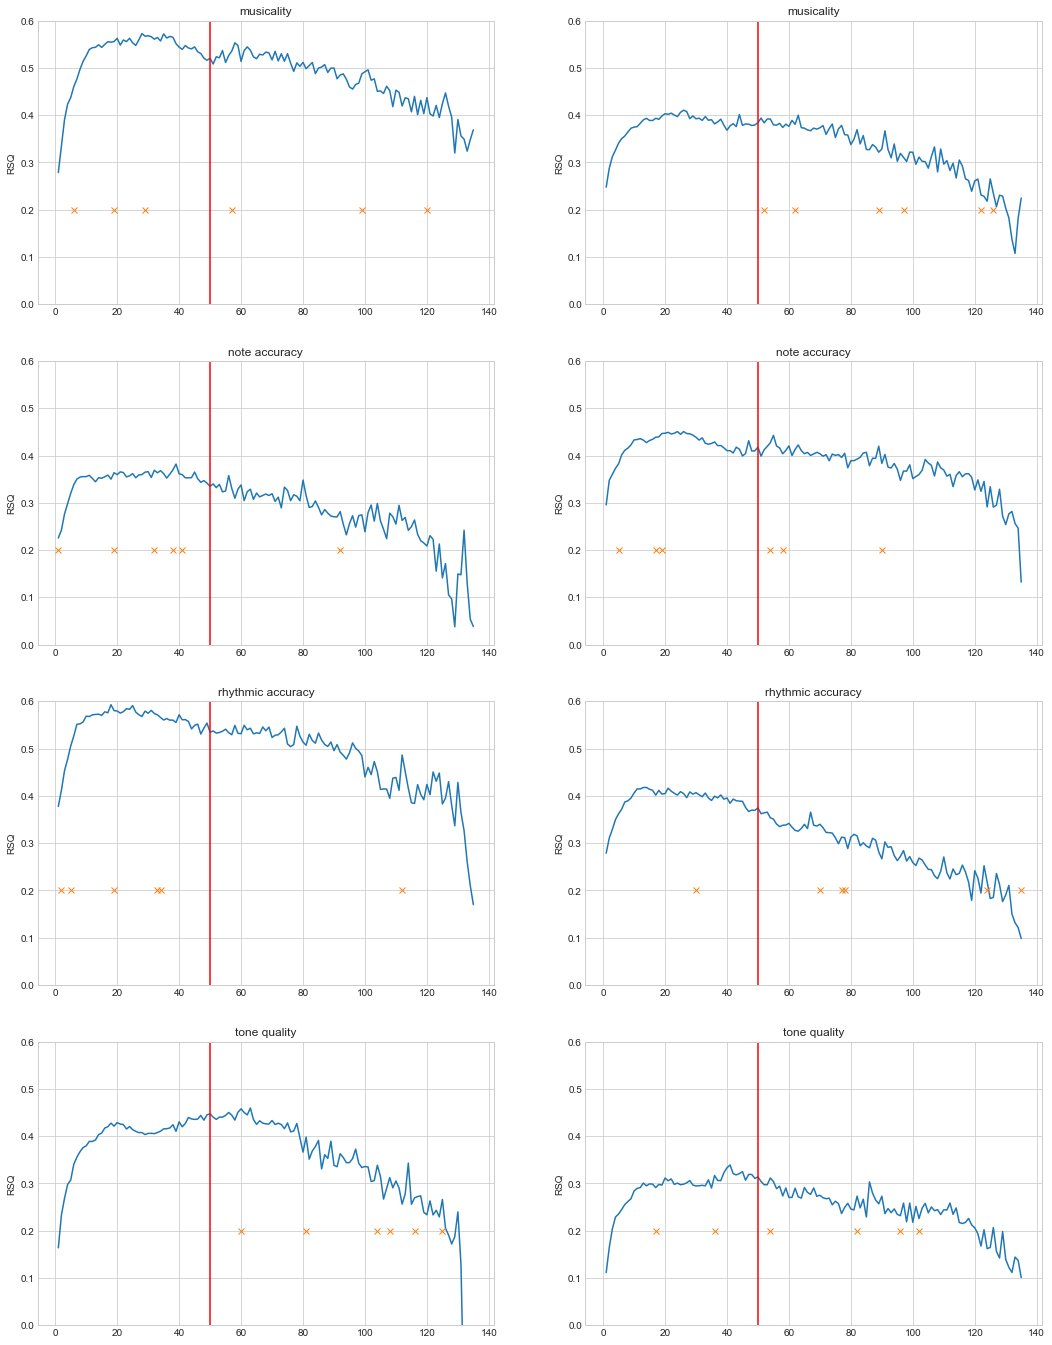

In [10]:
# 1
# compare the same group of feature among categories
compareCategories(feature_dtwjump,[1,2,3,4]) 
# more important for technical exercise than for sight-reading
# maybe because judges have more tolerant attitude towards jumps(mistakes) in sight-reading than in technical exercise

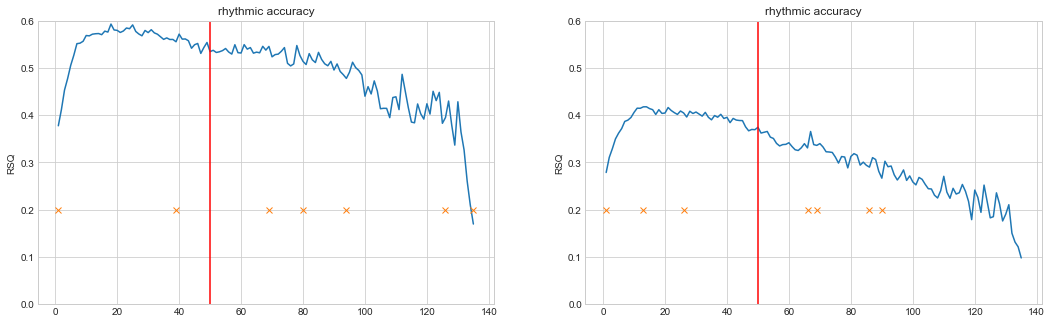

In [69]:
# 2.1
# compare the same group of feature among categories
compareCategories(feature_nlr_mean, [3]) # rhythmic accuracy
# mean of note length ratios indicates the speed of playing: faster -> better (generally speaking)
# sight-reading requires a combination of different abilities: reaction and interpretation of an unseen piece

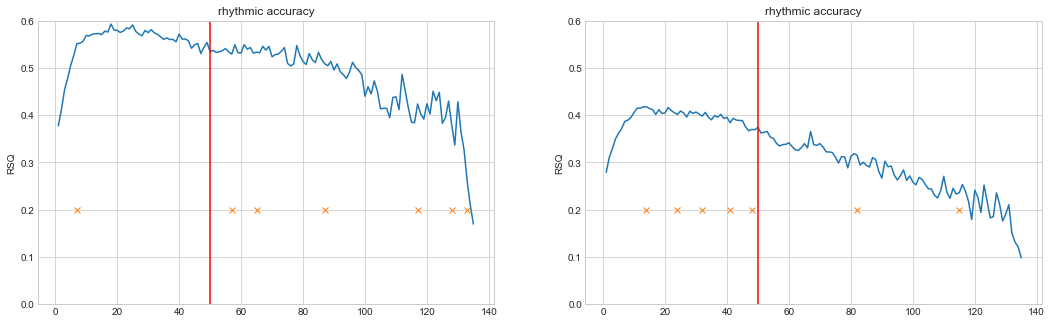

In [70]:
# 2.2
# compare the same group of feature among categories
compareCategories(feature_nlr_std, [3]) # rhythmic accuracy
# std of note length ratios indicates the steadiness of playing: more steady -> better
# see the difference between two exercises of [rhythmic accuracy]

In [73]:
# spectral features in [std features] mean&std of mean
feature_spec_1 = np.arange(0,17)+1
feature_spec_2 = np.arange(17,34)+1
# spectral features in [std features] mean&std of std
feature_spec_3 = np.arange(34, 51)+1
feature_spec_4 = np.arange(51,68)+1

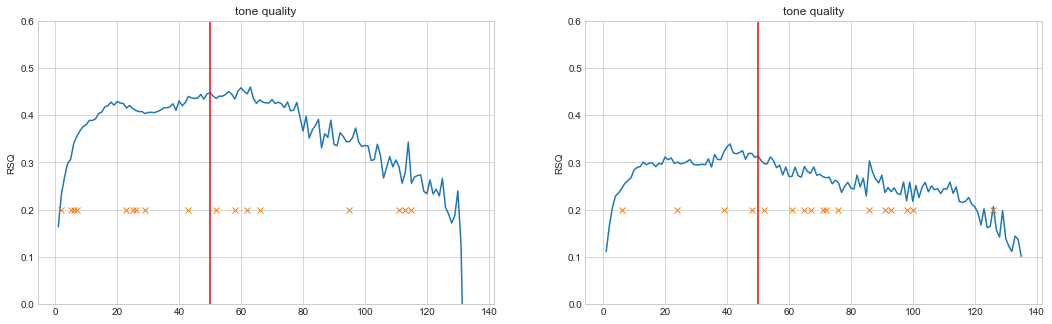

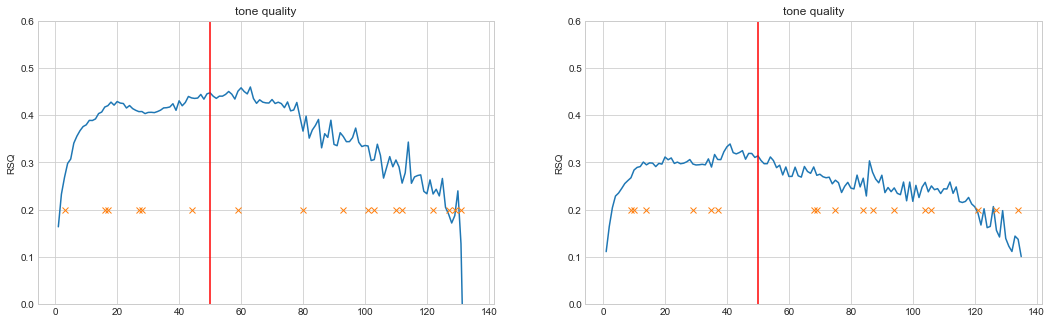

In [74]:
# 3.1
# compare the same group of feature among categories
compareCategories(feature_spec_1, [4])
compareCategories(feature_spec_3, [4])
# only see tone quality
# mean of mean and mean of std -> overall tone quality
# more important for technical exercise than for sight-reading exercise

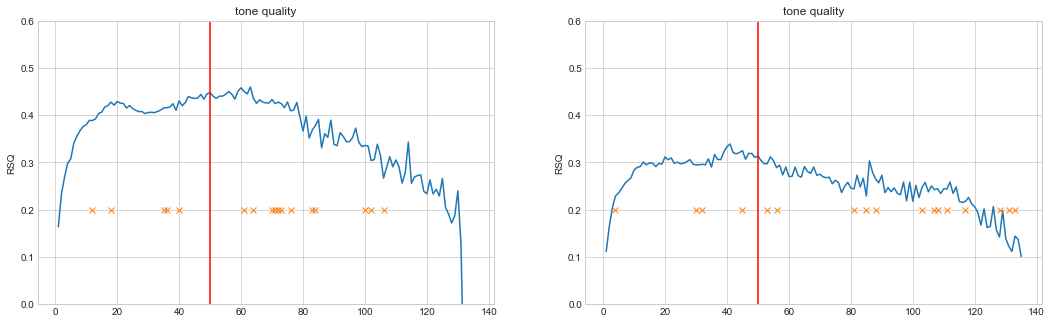

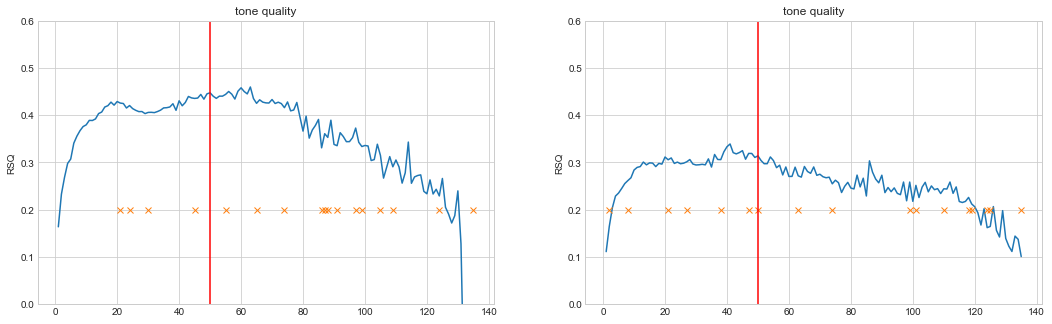

In [76]:
# 3.2
# compare the same group of feature among categories
compareCategories(feature_spec_2, [4]) # what does std of mean stand for?
compareCategories(feature_spec_4, [4]) #
# only see tone quality
# std of mean and std of std
# more important for sight-reading exercise than for technical exercise (at least for feature_spec_4)

In [82]:
# 4
# rhythmic features: IOI-hist nonscore vs. score
feature_ioi_non = np.arange(87, 93)
feature_ioi_score = np.arange(108, 114)

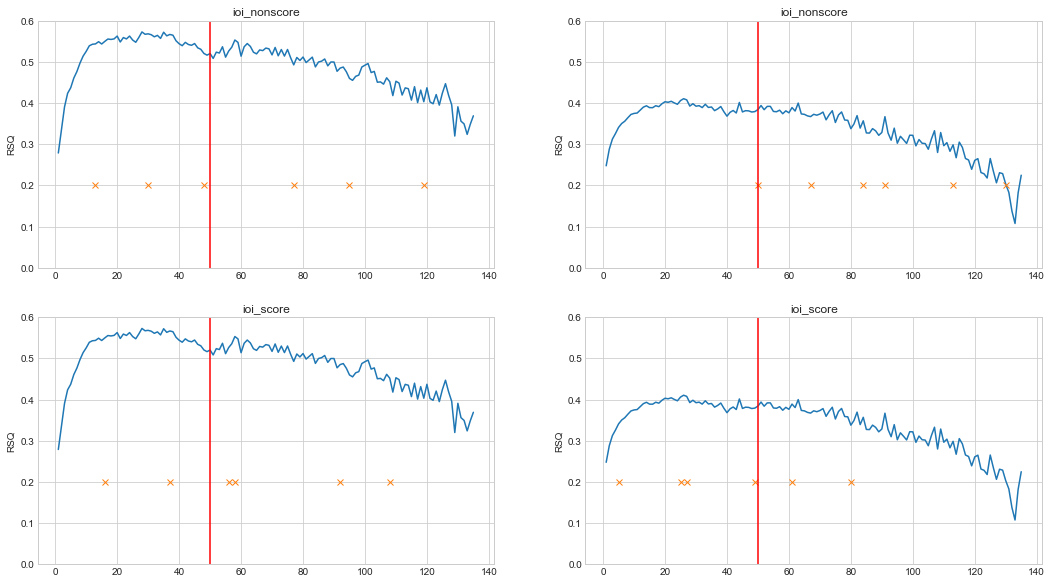

In [88]:
# 4.1
# compare different group of featues for one category
featureGroups = [feature_ioi_non, feature_ioi_score]
groupNames = ['ioi_nonscore', 'ioi_score']
compareGroups(1, featureGroups, groupNames) # musicality
# ioi_nonscore features work for technical exercise, do not work for sight-reading exercise
# ioi_score features work for both


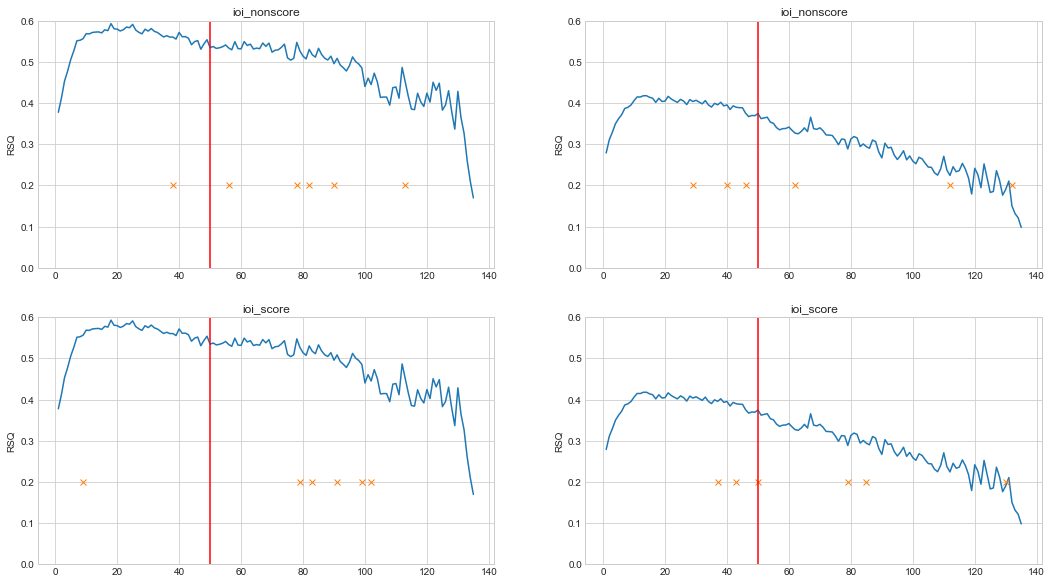

In [89]:
# 4.2
compareGroups(3, featureGroups, groupNames) # rhythmic accuracy
# which one is better?

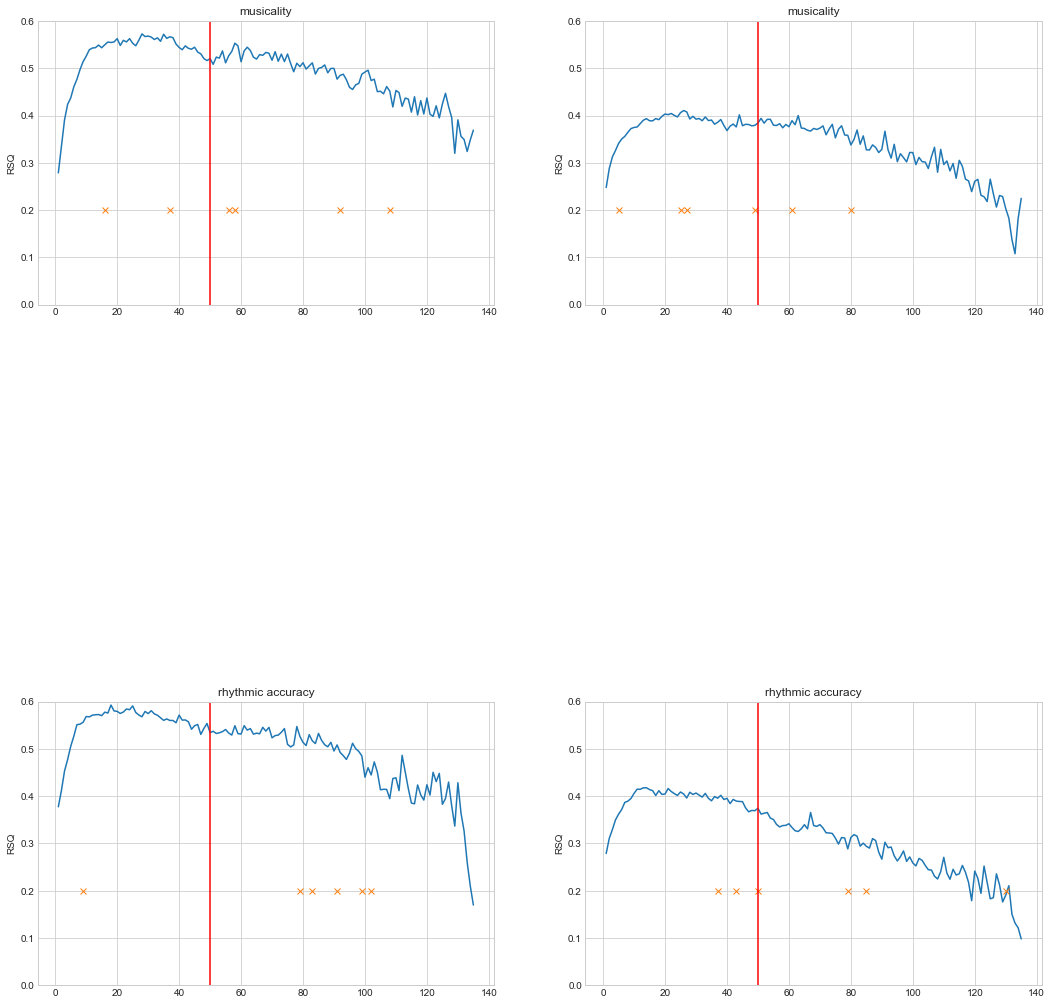

In [93]:
# 4.3
compareCategories(feature_ioi_score, [1,3])
# statistical features
# contribute more to musicality than to rhythmic accuracy